<a href="https://colab.research.google.com/github/skywalker0803r/Ricky/blob/master/%E7%8E%89%E5%B1%B1AI%E6%AF%94%E8%B3%BD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 原始資料

In [2]:
import pandas as pd
train = pd.read_csv("/content/drive/My Drive/玉山人工智慧比賽數據/train.csv")
print(train.shape)
train.head()

(1521787, 23)


,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,fraud_ind,hcefg,insfg,iterm,locdt,loctm,mcc,mchno,ovrlt,scity,stocn,stscd,txkey
0,6881,113261,38038,513.80,5,0,N,0,N,N,0,5,N,0,33,172652.0,457,59333,N,0,102,0,516056
1,0,134508,45725,465.62,5,0,N,2,N,N,0,0,N,0,9,105114.0,451,0,N,5817,102,0,4376
2,6881,15408,188328,513.80,5,0,N,0,N,N,0,5,N,0,6,152458.0,457,59333,N,0,102,0,483434
3,6716,157159,29967,1016.11,5,62,N,5,N,N,0,5,N,0,5,172946.0,247,50436,N,3281,102,0,1407164
4,5975,105985,81305,713.66,5,62,N,4,N,N,0,5,N,0,6,182129.0,263,93775,N,5817,102,0,1051004


In [3]:
train.isnull().sum()

acqic            0
bacno            0
cano             0
conam            0
contp            0
csmcu            0
ecfg             0
etymd            0
flbmk        12581
flg_3dsmk    12581
fraud_ind        0
hcefg            0
insfg            0
iterm            0
locdt            0
loctm            0
mcc              0
mchno            0
ovrlt            0
scity            0
stocn            0
stscd            0
txkey            0
dtype: int64

0    1501432
1      20355
Name: fraud_ind, dtype: int64

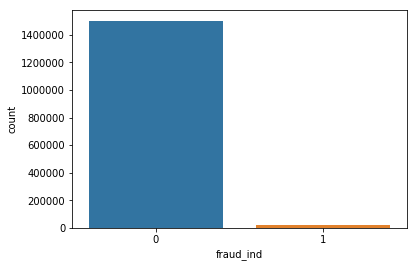

In [4]:
import seaborn as sns
sns.countplot(train['fraud_ind'])
train['fraud_ind'].value_counts()

# 處理樣本問題

1    20355
0    20355
Name: fraud_ind, dtype: int64

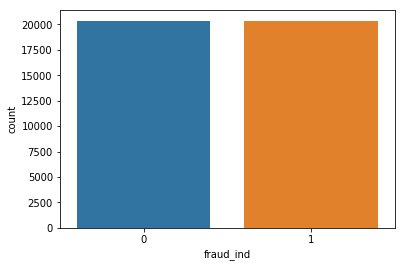

In [5]:
沒被盜刷樣本 = train[train['fraud_ind']==0].sample(20355)
被盜刷樣本 = train[train['fraud_ind']==1]
train = pd.concat([沒被盜刷樣本,被盜刷樣本],axis=0)
train = train.reset_index(drop=True)
#處理完畢看一下
sns.countplot(train['fraud_ind'])
train['fraud_ind'].value_counts()

In [6]:
test = pd.read_csv("/content/drive/My Drive/玉山人工智慧比賽數據/test.csv")
print(test.shape)
test_txkey = test["txkey"]
test.head()

(421665, 22)


,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,hcefg,insfg,iterm,locdt,loctm,mcc,mchno,ovrlt,scity,stocn,stscd,txkey
0,6881,163188,116799,513.8,5,0,N,0,N,N,5,N,0,102,215328.0,457,59360,N,0,102,0,592489
1,6881,163188,116799,513.8,5,0,N,0,N,N,5,N,0,102,222007.0,457,59360,N,0,102,0,592452
2,6881,163188,116799,513.8,5,0,N,0,N,N,5,N,0,100,170013.0,457,59360,N,0,102,0,590212
3,6881,163188,116799,513.8,5,0,N,0,N,N,5,N,0,100,165914.0,457,59360,N,0,102,0,590209
4,6881,163188,116799,513.8,5,0,N,0,N,N,5,N,0,102,215311.0,457,59360,N,0,102,0,592488


In [7]:
test.isnull().sum()

acqic           0
bacno           0
cano            0
conam           0
contp           0
csmcu           0
ecfg            0
etymd           0
flbmk        3715
flg_3dsmk    3715
hcefg           0
insfg           0
iterm           0
locdt           0
loctm           0
mcc             0
mchno           0
ovrlt           0
scity           0
stocn           0
stscd           0
txkey           0
dtype: int64

# fill na

In [0]:
train['flbmk'] = train['flbmk'].fillna('unknown')
train['flg_3dsmk'] = train['flg_3dsmk'].fillna('unknown')
test['flbmk'] = test['flbmk'].fillna('unknown')
test['flg_3dsmk'] = test['flg_3dsmk'].fillna('unknown')

# 提出問題&基本假設

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

def Query_frequency(data,col):
  fraud_ind_total = data[data.fraud_ind == 1][col].value_counts()
  record_total = data[col].value_counts()
  Probability = fraud_ind_total/record_total
  return Probability.fillna(0)

# 根據不同條件觀察盜刷發生機率

In [0]:
y_name = 'fraud_ind'

count    941.000000
mean       0.487728
std        0.463334
min        0.000000
25%        0.000000
50%        0.500000
75%        1.000000
max        1.000000
Name: acqic, dtype: float64
941


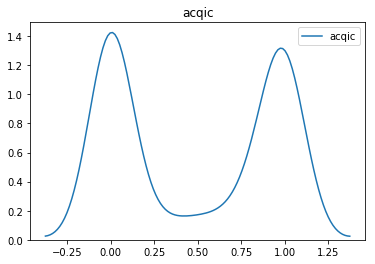

count    22478.000000
mean         0.340540
std          0.449832
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: bacno, dtype: float64
22478


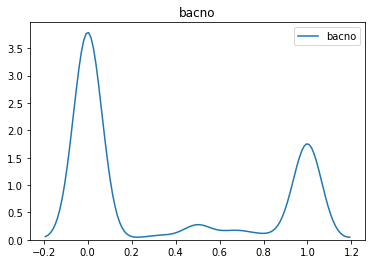

count    24479.000000
mean         0.335766
std          0.460499
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: cano, dtype: float64
24479


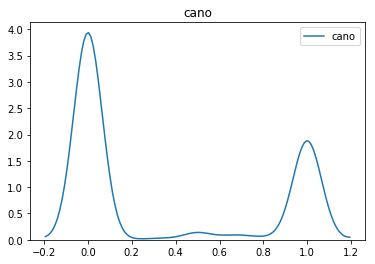

count    11036.000000
mean         0.590213
std          0.474897
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: conam, dtype: float64
11036


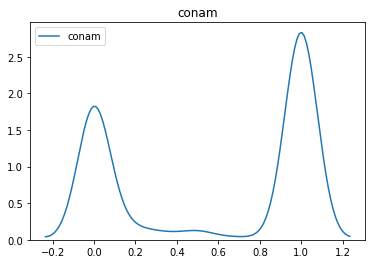

count    5.000000
mean     0.270829
std      0.244021
min      0.008762
25%      0.014778
50%      0.350000
75%      0.464435
max      0.516169
Name: contp, dtype: float64
5


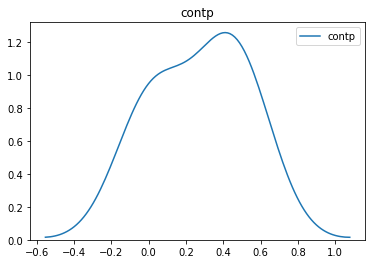

count    48.000000
mean      0.719464
std       0.313751
min       0.000000
25%       0.500000
50%       0.839744
75%       0.991883
max       1.000000
Name: csmcu, dtype: float64
48


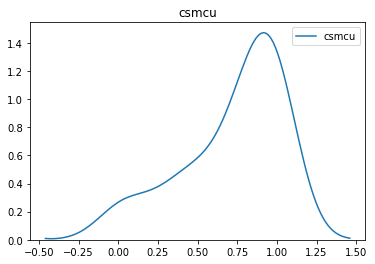

count    2.000000
mean     0.467524
std      0.439107
min      0.157028
25%      0.312276
50%      0.467524
75%      0.622772
max      0.778020
Name: ecfg, dtype: float64
2


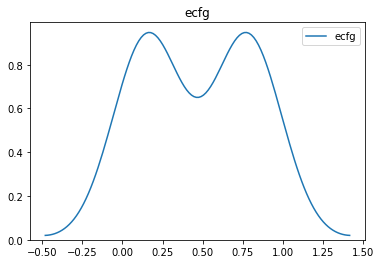

count    10.000000
mean      0.424238
std       0.359714
min       0.035746
25%       0.103098
50%       0.356965
75%       0.741739
max       0.985294
Name: etymd, dtype: float64
10


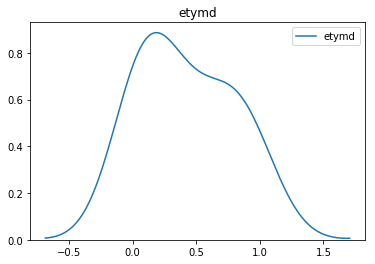

count    3.000000
mean     0.547796
std      0.061528
min      0.499341
25%      0.513184
50%      0.527027
75%      0.572024
max      0.617021
Name: flbmk, dtype: float64
3


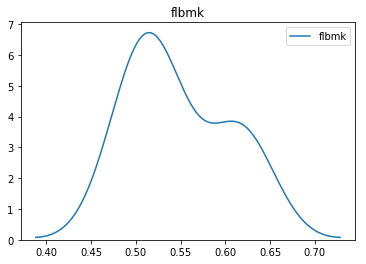

count    3.000000
mean     0.378980
std      0.241755
min      0.100000
25%      0.304957
50%      0.509914
75%      0.518470
max      0.527027
Name: flg_3dsmk, dtype: float64
3


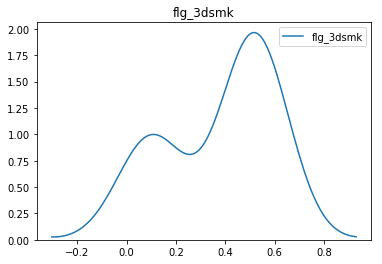

count    9.000000
mean     0.138163
std      0.220658
min      0.000000
25%      0.000000
50%      0.029453
75%      0.117647
max      0.527027
Name: hcefg, dtype: float64
9


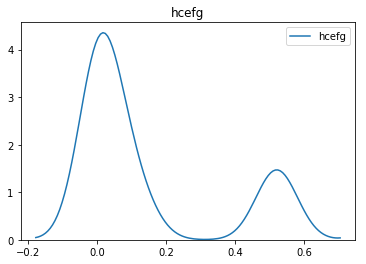

count    2.000000
mean     0.285545
std      0.312022
min      0.064912
25%      0.175229
50%      0.285545
75%      0.395862
max      0.506178
Name: insfg, dtype: float64
2


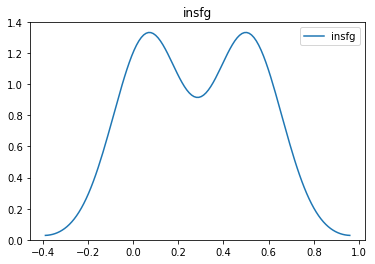

count    9.000000
mean     0.077687
std      0.168321
min      0.000000
25%      0.000000
50%      0.000000
75%      0.032258
max      0.506178
Name: iterm, dtype: float64
9


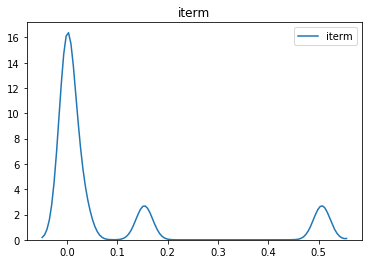

count    90.000000
mean      0.487801
std       0.081905
min       0.298901
25%       0.434188
50%       0.481344
75%       0.527996
max       0.731183
Name: locdt, dtype: float64
90


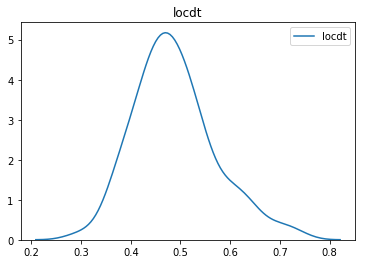

count    31158.000000
mean         0.501734
std          0.470955
min          0.000000
25%          0.000000
50%          0.500000
75%          1.000000
max          1.000000
Name: loctm, dtype: float64
31158


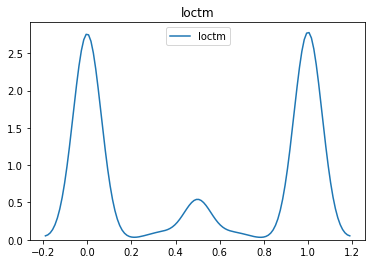

count    246.000000
mean       0.448273
std        0.392644
min        0.000000
25%        0.017274
50%        0.382283
75%        0.865047
max        1.000000
Name: mcc, dtype: float64
246


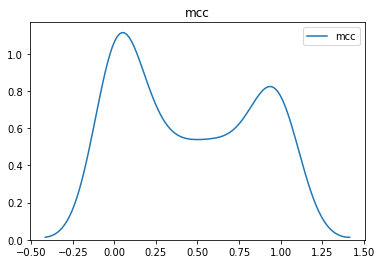

count    8925.000000
mean        0.207401
std         0.398848
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: mchno, dtype: float64
8925


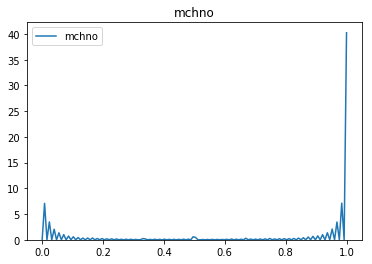

count    2.000000
mean     0.601615
std      0.150331
min      0.495316
25%      0.548466
50%      0.601615
75%      0.654765
max      0.707915
Name: ovrlt, dtype: float64
2


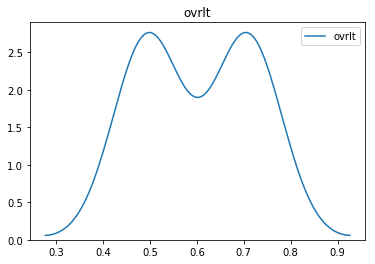

count    1461.000000
mean        0.684767
std         0.441991
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: scity, dtype: float64
1461


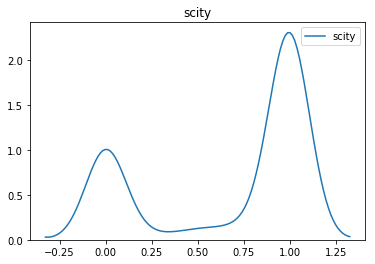

count    64.000000
mean      0.710735
std       0.307931
min       0.000000
25%       0.639140
50%       0.809091
75%       0.950379
max       1.000000
Name: stocn, dtype: float64
64


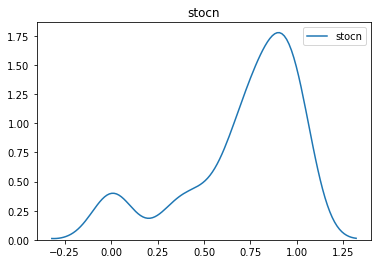

count    3.000000
mean     0.761575
std      0.297448
min      0.421072
25%      0.656965
50%      0.892857
75%      0.931826
max      0.970795
Name: stscd, dtype: float64
3


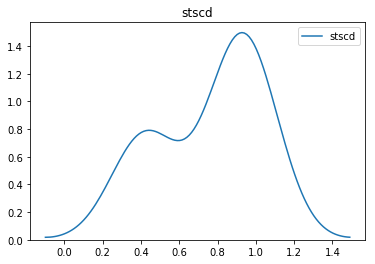

count    40710.000000
mean         0.500000
std          0.500006
min          0.000000
25%          0.000000
50%          0.500000
75%          1.000000
max          1.000000
Name: txkey, dtype: float64
40710


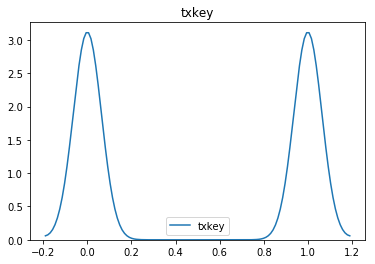

In [11]:
for col in train.drop(y_name,axis=1).columns:
  print(Query_frequency(train,col).describe())
  print(len(train[col].unique()))
  sns.kdeplot(Query_frequency(train,col))
  plt.title(col)
  plt.show()

# 特徵工程

In [12]:
x_columns = train.drop(y_name,axis=1).columns.tolist()
print(len(x_columns))

22


In [0]:
for col in x_columns:
  P = Query_frequency(train,col)
  train[col] = train[col].map(P)
  test[col] = test[col].map(P)

# select columns

In [14]:
features = set(train.columns[train.isnull().sum()==0])&set(test.columns[test.isnull().sum()==0])
features = list(features)
print(features)
print(y_name)

['flbmk', 'iterm', 'ecfg', 'ovrlt', 'flg_3dsmk', 'insfg']
fraud_ind


In [15]:
train = train[features+[y_name]]
test = test[features]
print(train.shape)
print(train.head())
print(test.shape)
print(test.head())

(40710, 7)
      flbmk     iterm      ecfg     ovrlt  flg_3dsmk     insfg  fraud_ind
0  0.499341  0.506178  0.157028  0.495316   0.509914  0.506178          0
1  0.499341  0.506178  0.157028  0.495316   0.509914  0.506178          0
2  0.499341  0.506178  0.157028  0.495316   0.509914  0.506178          0
3  0.499341  0.006897  0.157028  0.495316   0.509914  0.064912          0
4  0.499341  0.506178  0.157028  0.495316   0.509914  0.506178          0
(421665, 6)
      flbmk     iterm      ecfg     ovrlt  flg_3dsmk     insfg
0  0.499341  0.506178  0.157028  0.495316   0.509914  0.506178
1  0.499341  0.506178  0.157028  0.495316   0.509914  0.506178
2  0.499341  0.506178  0.157028  0.495316   0.509914  0.506178
3  0.499341  0.506178  0.157028  0.495316   0.509914  0.506178
4  0.499341  0.506178  0.157028  0.495316   0.509914  0.506178


# standscaler

In [16]:
from sklearn.preprocessing import StandardScaler
#def scaler
scaler = StandardScaler()
scaler.fit(train[features])

#transform
train[features] = scaler.transform(train[features])
test[features] = scaler.transform(test[features])

#print result
print(train.head())
print(test.head())

      flbmk     iterm      ecfg     ovrlt  flg_3dsmk     insfg  fraud_ind
0 -0.089298  0.117630 -1.110686 -0.150101   0.156127  0.119165          0
1 -0.089298  0.117630 -1.110686 -0.150101   0.156127  0.119165          0
2 -0.089298  0.117630 -1.110686 -0.150101   0.156127  0.119165          0
3 -0.089298 -9.388175 -1.110686 -0.150101   0.156127 -8.391725          0
4 -0.089298  0.117630 -1.110686 -0.150101   0.156127  0.119165          0
      flbmk    iterm      ecfg     ovrlt  flg_3dsmk     insfg
0 -0.089298  0.11763 -1.110686 -0.150101   0.156127  0.119165
1 -0.089298  0.11763 -1.110686 -0.150101   0.156127  0.119165
2 -0.089298  0.11763 -1.110686 -0.150101   0.156127  0.119165
3 -0.089298  0.11763 -1.110686 -0.150101   0.156127  0.119165
4 -0.089298  0.11763 -1.110686 -0.150101   0.156127  0.119165


# train_val split

In [0]:
from sklearn.model_selection import train_test_split
X = train[features]
y = train[y_name]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# modeling

In [18]:
from xgboost import XGBClassifier
xgbc = XGBClassifier(objective="reg:squarederror")
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='reg:squarederror', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [19]:
xgbc.score(X_val,y_val)

0.8355440923605993

In [20]:
y_pred = xgbc.predict(X_val)
pd.Series(y_pred).value_counts()

1    4289
0    3853
dtype: int64

# report

In [21]:
from sklearn.metrics import classification_report 
target_names = ['0','1']
print(classification_report(y_val,y_pred,target_names=target_names))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83      4030
           1       0.82      0.86      0.84      4112

    accuracy                           0.84      8142
   macro avg       0.84      0.84      0.84      8142
weighted avg       0.84      0.84      0.84      8142



# 產生submission

In [23]:
final_pred = xgbc.predict(test)

submission = pd.DataFrame()
submission["txkey"] = test_txkey
submission["fraud_ind"] = final_pred
submission.head()

,txkey,fraud_ind
0,592489,0
1,592452,0
2,590212,0
3,590209,0
4,592488,0


In [0]:
submission.to_csv("./submission.csv")